# **Importing Data From Kaggle :**

In [ ]:
!pip install q kaggle

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from google.colab import autoviz
import seaborn as sns

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"youneszyadi","key":"136c4d8540ca2c1346ac2c9aeea17504"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           2796        239  1.0              
bhavikjikadara/car-price-prediction-dataset            Car Price Prediction Dataset                  4KB  2023-12-23 07:07:54            992         29  0.9411765        
thedevastator/global-video-game-sales-and-reviews      Global Video Game Sales and Reviews          56KB  2023-12-20 06:36:51            918         25  1.0              
vassyesboy/netflix-engagement-jan-jun-23               Netflix Engagement (Jan - Jun 23) +           2MB  2023-12-15 11:58:07           1093     

In [ ]:
!kaggle datasets download -d nikitarom/planets-dataset

100% 1.50G/1.50G [01:22<00:00, 20.3MB/s]
100% 1.50G/1.50G [01:22<00:00, 19.5MB/s]


In [ ]:
! unzip planets-dataset.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: test-jpg-additional/test-jpg-additional/file_5499.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_55.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_550.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5500.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5501.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5502.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5503.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5504.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5505.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5506.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5507.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5508.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5509.jpg  
  inflating: test-jpg-additi

# **Importing Libraries :**

In [ ]:
# Numerical computing library
import numpy as np

# Data manipulation and analysis library
import pandas as pd

# Plotting library for creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Operating system interaction
import os

# Garbage collector for memory management
import gc

# Deep learning library
import tensorflow as tf
from tensorflow import keras

# High-level neural networks API running on top of TensorFlow
import keras as k
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization

# Open Source Computer Vision Library
import cv2

# Progress bar for loops and pipelines
from tqdm import tqdm

# Counter for counting hashable objects
from collections import Counter

# Utility functions for machine learning tasks
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score

# High-level interface for creating expressive and interactive plots
import plotly.express as px

# **Loading The Dataset**

In [ ]:
# Define the base path for the dataset
path = "../content/planet/planet/"

# Join the base path with the train-jpg folder
path_train = os.path.join(path, "train-jpg")

# Join the base path with the test-jpg folder
path_test = os.path.join(path, "test-jpg")

# Use the os.listdir function to get the number of files in the train-jpg and test-jpg folders
print(
    f"train files: {len(os.listdir(path_train))}, "
    f"test files: {len(os.listdir(path_test))}"
)

train files: 40479, test files: 40669


In [ ]:
# Define the path to the train_classes.csv file
path_train_class = os.path.join(path, "train_classes.csv")

# Read the train_classes.csv file and store it in a DataFrame
df_train = pd.read_csv(path_train_class)

# Print the shape of the DataFrame
print(df_train.shape)

# Display the first 5 rows of the DataFrame
df_train.head(10)

(40479, 2)


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


# **Exploring and Understanding the Labels in the dataset**

## **Sample of Used Images :**

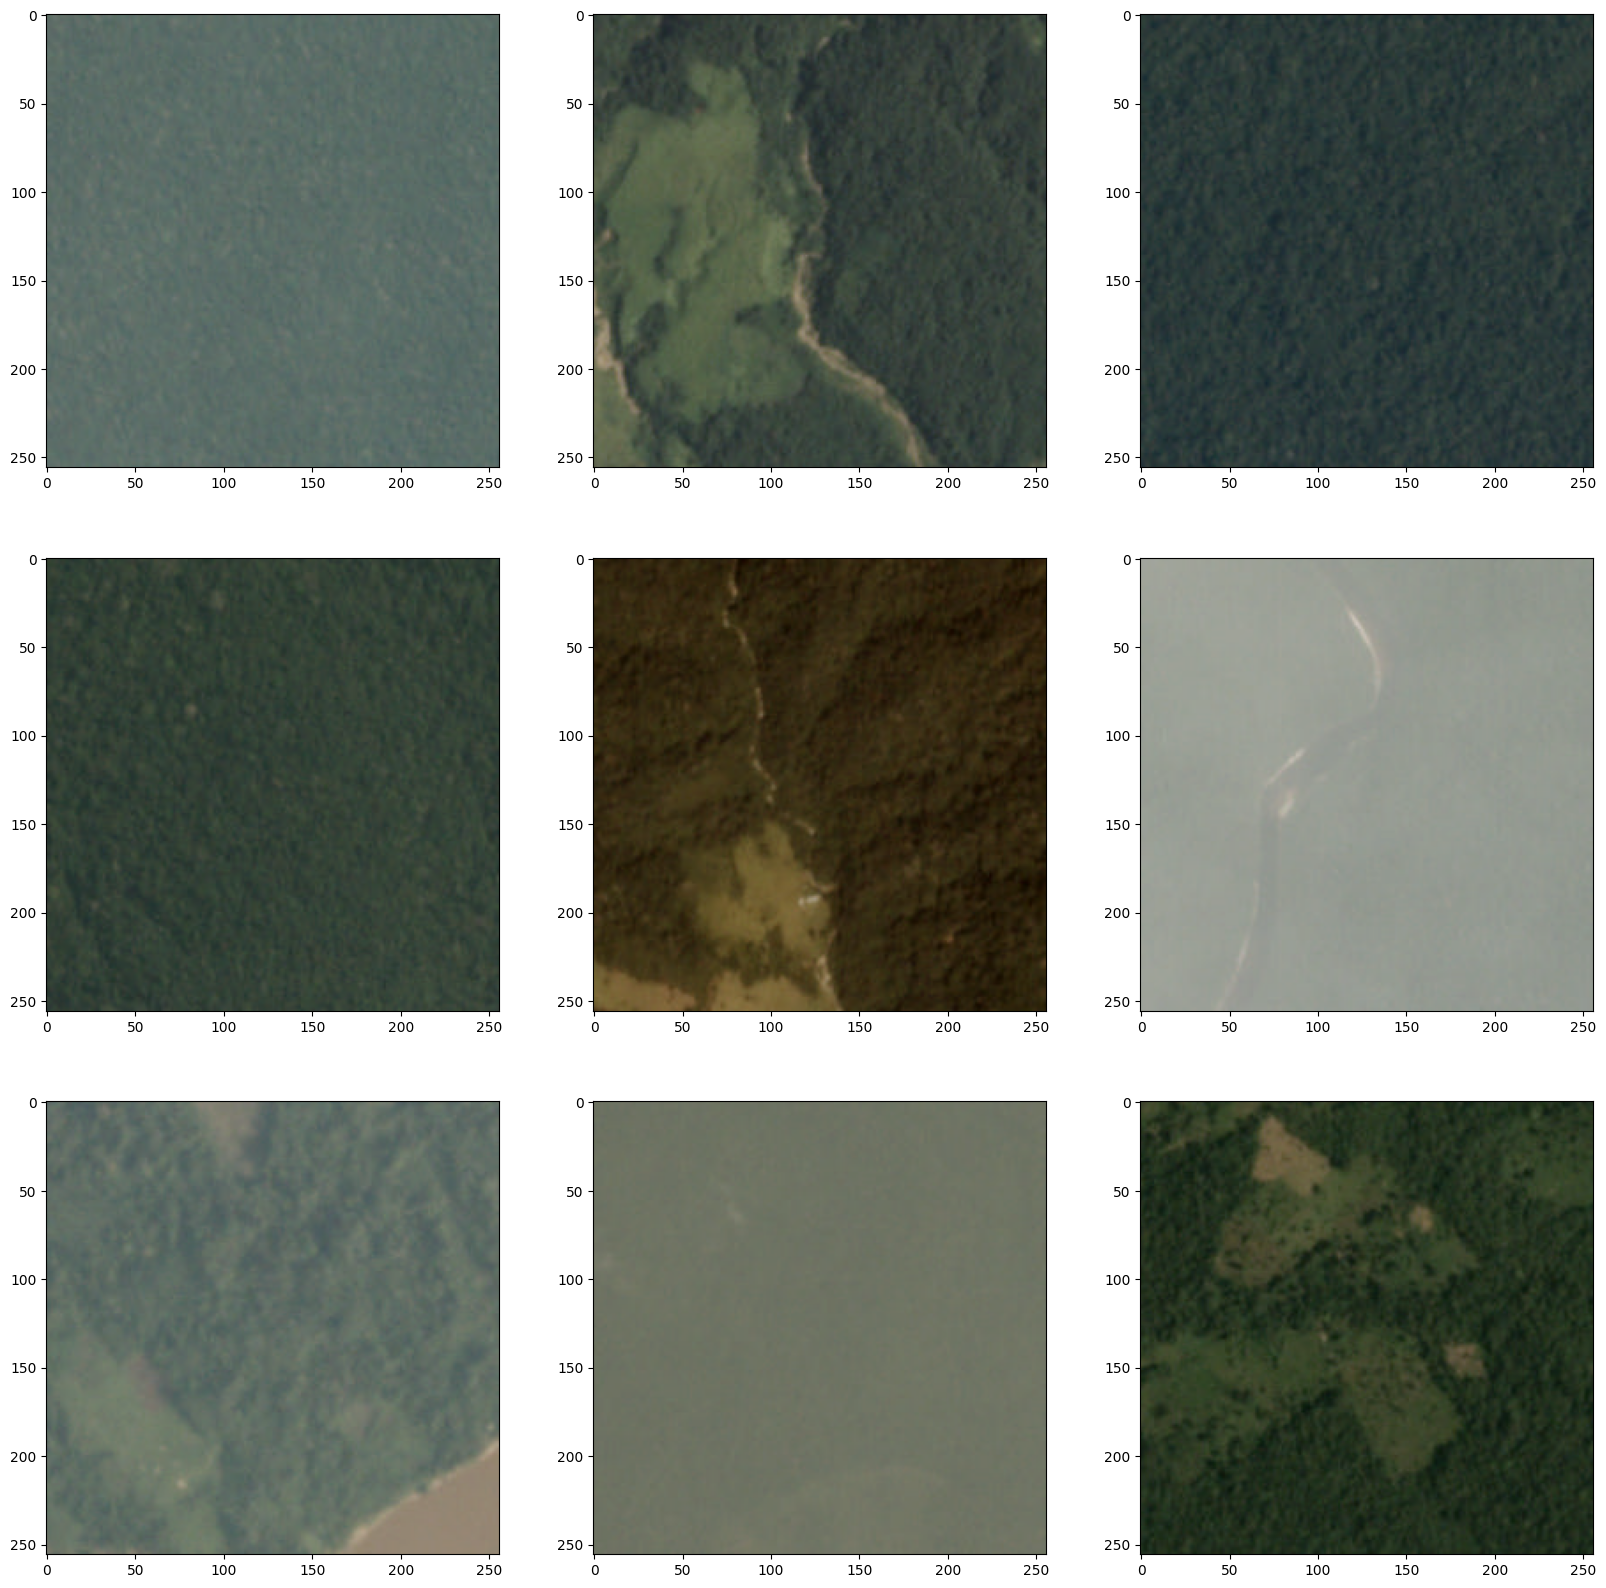

In [ ]:
from matplotlib.image import imread
# Let's view some images
plt.figure(figsize=(20,20))
# define location of dataset
folder = path_train
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # define filename
    filename = folder + '/train_' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

# **Explore Unique Labels**

In [ ]:
unique_labels = df_train['tags'].unique()
unique_labels_df = pd.DataFrame({'Unique Labels': unique_labels})
print("Unique Labels:\n")
unique_labels_df.head(10)

Unique Labels:



,Unique Labels
0,haze primary
1,agriculture clear primary water
2,clear primary
3,agriculture clear habitation primary road
4,haze primary water
5,agriculture clear cultivation primary water
6,agriculture clear cultivation primary
7,agriculture clear cultivation primary road
8,agriculture clear primary slash_burn water
9,clear primary water


# **Label Distribution:**

In [ ]:
label_distribution = df_train['tags'].value_counts()
label_distribution_df = pd.DataFrame({'Label': label_distribution.index, 'Count': label_distribution.values})
print("Label Distribution:\n")
label_distribution_df.head(10)

Label Distribution:



,Label,Count
0,clear primary,13636
1,partly_cloudy primary,3630
2,cloudy,2089
3,clear primary water,1850
4,agriculture clear primary road,1680
5,agriculture clear primary,1626
6,haze primary,1471
7,agriculture clear cultivation primary,1170
8,agriculture clear habitation primary road,1125
9,agriculture clear primary water,712


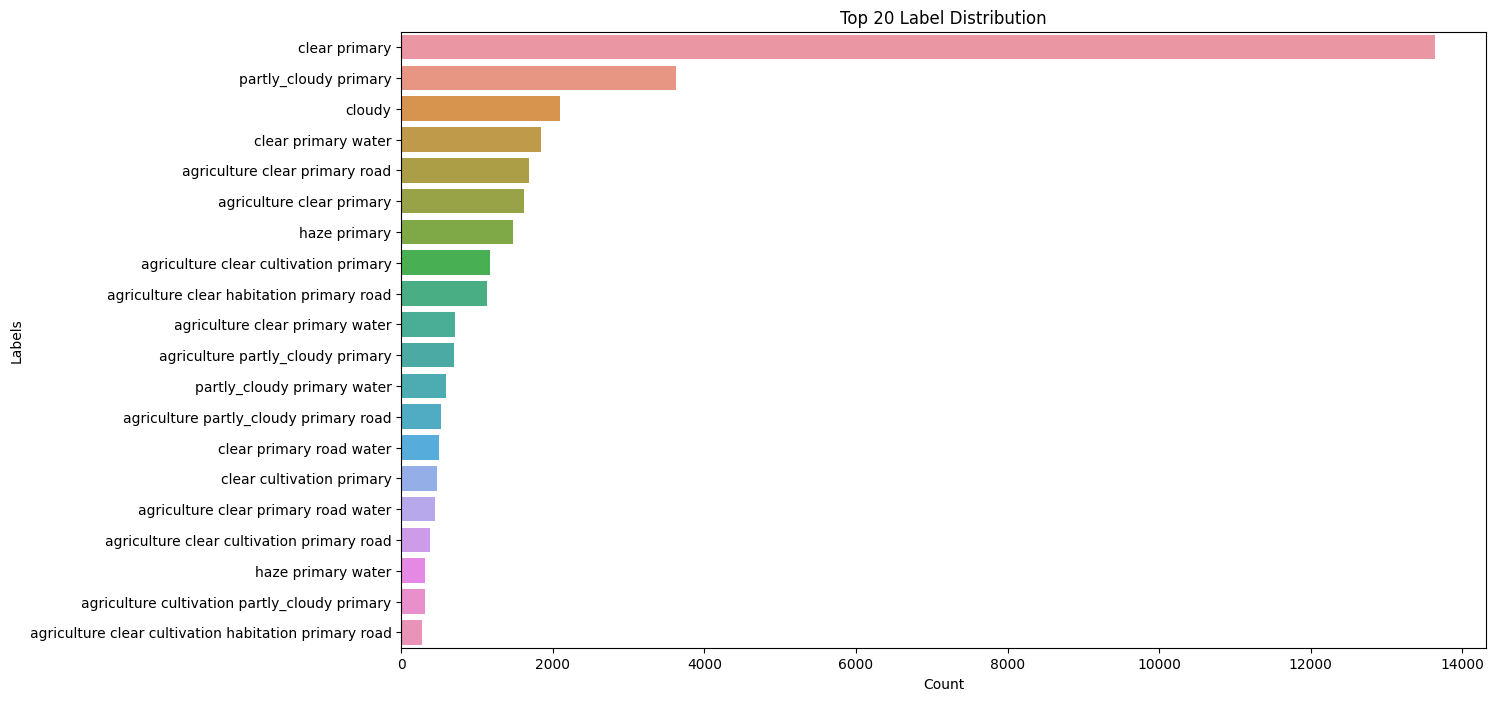

In [ ]:
# Label Distribution
label_distribution = df_train['tags'].value_counts()
top_n = 20  # Adjust this number based on how many top tags you want to display
top_labels = label_distribution.head(top_n)

# Plotting top N labels with seaborn countplot
plt.figure(figsize=(14, 8))
sns.barplot(x=top_labels.values, y=top_labels.index)
plt.title(f'Top {top_n} Label Distribution')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

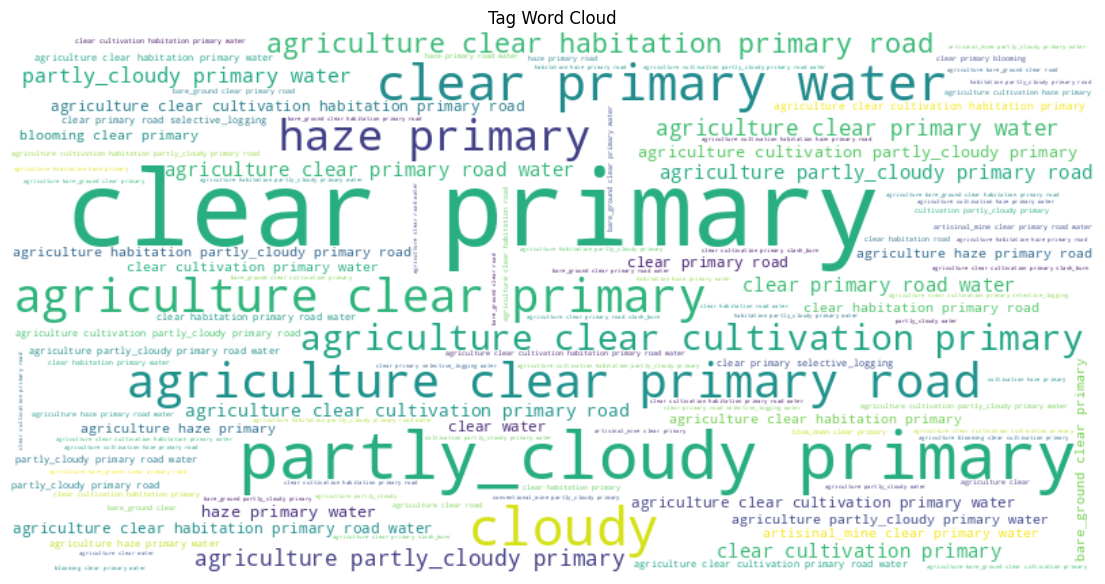

In [ ]:
from wordcloud import WordCloud

# Label Distribution
label_distribution = df_train['tags'].value_counts()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(label_distribution)

# Plotting the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tag Word Cloud')
plt.show()

# **Multi-label Analysis:**

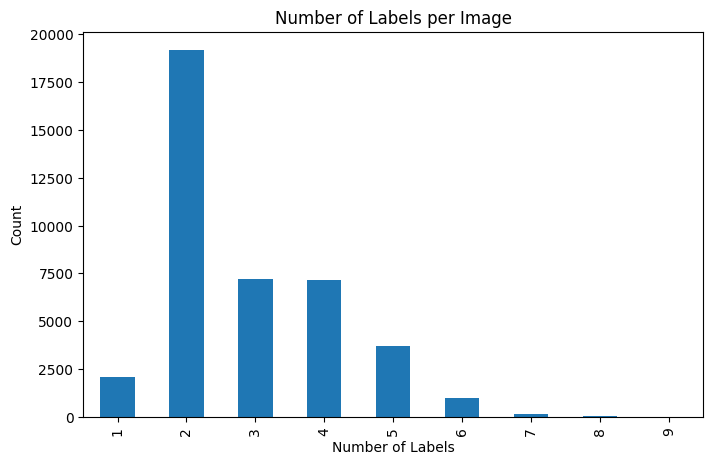

In [ ]:
# Count the number of labels for each image
df_train['num_labels'] = df_train['tags'].apply(lambda x: len(x.split()))

# Plotting the distribution of the number of labels
plt.figure(figsize=(8, 5))
df_train['num_labels'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Labels per Image')
plt.xlabel('Number of Labels')
plt.ylabel('Count')
plt.show()

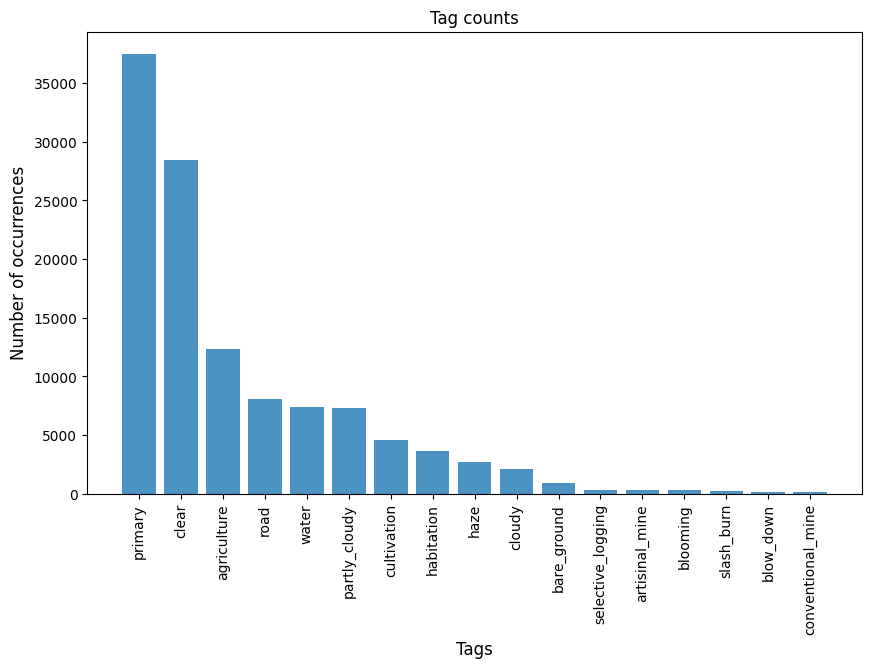

In [ ]:
# Tags present in the dataset
tags = df_train['tags'].apply(lambda x: x.split(' '))
tags = [item for sublist in tags for item in sublist]
tag_counts = pd.Series(tags).value_counts()

# Plot the tags
plt.figure(figsize=(10,6))
plt.bar(tag_counts.index, tag_counts.values, alpha=0.8)
plt.title('Tag counts')
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Tags', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [ ]:
# Number Of Unique Tags In The Dataset
# Avereage Of Labels Per Image

all_tags = [item for sublist in list(df_train['tags'].apply(lambda row: row.split(" ")).values) for item in sublist]
print('total of {} non-unique tags in all training images'.format(len(all_tags)))
print('average number of labels per image {}'.format(1.0*len(all_tags)/df_train.shape[0]))

total of 116278 non-unique tags in all training images
average number of labels per image 2.8725511993873365


In [ ]:
# Label Distribution

# Add a new column 'list_tags' to the DataFrame by splitting the 'tags' column on the space character
df_train["list_tags"] = df_train.tags.str.split(" ")

# Get the values of the new column
row_tags = df_train.list_tags.values

# Flatten the list of tags
tags = [tag for row in row_tags for tag in row]

# Count the occurrences of each tag
counter_tags = Counter(tags)

# Create a new DataFrame with the tag and total columns
df_tags = pd.DataFrame(
    {"tag": counter_tags.keys(), "total": counter_tags.values()}
).sort_values("total")

# Create a bar chart of the tag distribution using Plotly
fig = px.bar(df_tags, x="total", y="tag", orientation="h",
             color="total",
)

# Update the chart title
fig.update_layout(title="Tags distribution")

# Show the chart
fig.show()

In [ ]:
df_train.head(10)

,image_name,tags,num_labels,list_tags
0,train_0,haze primary,2,"[haze, primary]"
1,train_1,agriculture clear primary water,4,"[agriculture, clear, primary, water]"
2,train_2,clear primary,2,"[clear, primary]"
3,train_3,clear primary,2,"[clear, primary]"
4,train_4,agriculture clear habitation primary road,5,"[agriculture, clear, habitation, primary, road]"
5,train_5,haze primary water,3,"[haze, primary, water]"
6,train_6,agriculture clear cultivation primary water,5,"[agriculture, clear, cultivation, primary, water]"
7,train_7,haze primary,2,"[haze, primary]"
8,train_8,agriculture clear cultivation primary,4,"[agriculture, clear, cultivation, primary]"
9,train_9,agriculture clear cultivation primary road,5,"[agriculture, clear, cultivation, primary, road]"


# **Preparing the Data For CNN Model Training**

In [ ]:
# Drop the created "list_tags" column

df_train = df_train.drop(["list_tags","num_labels"], axis='columns')
df_train.head(10)

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


# **SPLITING TAGS - ENCODE - RESIZE**

In [ ]:
# Initialization and Image Reading

# Initialize empty lists to store the training images and their labels
x_train = []
y_train = []

# Flatten the list of tags
flatten = lambda l: [item for sublist in l for item in sublist]
labels = list(set(flatten([l.split(' ') for l in df_train['tags'].values])))

# Create a label map for the unique tags in the dataset
label_map = {l: i for i, l in enumerate(labels)}
inv_label_map = {i: l for l, i in label_map.items()}

# Loop through the training DataFrame
for f, tags in tqdm(df_train.values, miniters=1000):
    # Read the image file by OpenCV
    img = cv2.imread('../content/planet/planet/train-jpg/{}.jpg'.format(f))
    # Initialize an array of zeros for the targets 17 Classes
    targets = np.zeros(17)
    # Loop through the tags for the current image
    for t in tags.split(' '):
        # Set the corresponding target value to 1 : One Hot Encoding
        targets[label_map[t]] = 1
    # Append the image and its labels to the appropriate lists
    x_train.append(cv2.resize(img, (64, 64)))  # Indicate the IMG Size
    y_train.append(targets)

100%|██████████| 40479/40479 [01:01<00:00, 658.29it/s]


# **NORMALIZING DATA :**

In [ ]:
# Converting the lists of images and labels to numpy arrays and normalizing the pixel values of the images.
x_train = np.array(x_train, np.float16) / 255.
y_train = np.array(y_train, np.uint8)

# **Splitting DATA**

In [ ]:
# Splitting the data into train and validation sets.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle = True, random_state = 1)

# Prints the shape of the training and validation data.
print("Train data shape:",x_train.shape)
print("Train label shape:",y_train.shape)

print("Validation data shape:",x_val.shape)
print("Validation label shape:",y_val.shape)

Train data shape: (32383, 64, 64, 3)
Train label shape: (32383, 17)
Validation data shape: (8096, 64, 64, 3)
Validation label shape: (8096, 17)


In [ ]:
# Free up some memory that is not being used by the program
gc.collect()

34

In [ ]:
# Defining a function that calculates the F-beta score for a given set of true labels and predicted labels.
# The function balances precision and recall and it is useful when there is an imbalance in the number of positive and negative examples in the data.
def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 2

    # Clipping y_pred between 0 and 1
    y_pred = K.clip(y_pred, 0, 1)

    # Rounding y_pred to binary values
    y_pred_bin = K.round(y_pred + threshold_shift)

    # Counting true positives, false positives, and false negatives
    tp = K.sum(K.round(y_true * y_pred_bin)) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

    # Calculating precision and recall
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    # Calculating the F-beta score
    return (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon())

In [ ]:
# This code defines a function that calculates the accuracy score for a given set of true labels and predicted labels.
def accuracy_score(y_true, y_pred, epsilon = 1e-4):

    # casting the true labels and predicted labels to float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(tf.cast(y_pred, tf.float32), tf.constant(0.5)), tf.float32)

    # counting the true positives
    tp = tf.reduce_sum(y_true * y_pred, axis = 1)

    # counting the false positives
    fp = tf.reduce_sum(y_pred, axis = 1) - tp

    # counting the false negatives
    fn = tf.reduce_sum(y_true, axis = 1) - tp

    # casting the true labels and predicted labels to boolean
    y_true = tf.cast(y_true, tf.bool)
    y_pred = tf.cast(y_pred, tf.bool)

    # counting the true negatives
    tn = tf.reduce_sum(tf.cast(tf.logical_not(y_true), tf.float32) * tf.cast(tf.logical_not(y_pred), tf.float32),
                       axis = 1)
    #calculating the accuracy score
    return (tp + tn)/(tp + tn + fp + fn + epsilon)

In [ ]:
# Configure TensorFlow GPU options
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.9  # Adjust as needed
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# **Model without Dropout:**

In [ ]:
# Importing different optimization algorithms from tensorflow.keras.optimizers
from keras.optimizers import Adam

# Instantiate the optimizer objects
optimizer_Adam = Adam()

In [ ]:
gc.collect()

0

In [ ]:
# Define The Model
model_no_dropout = keras.Sequential()

# Adding The Layers
model_no_dropout.add(BatchNormalization(input_shape=(64, 64, 3)))
model_no_dropout.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model_no_dropout.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_no_dropout.add(MaxPooling2D(pool_size=(2, 2)))

model_no_dropout.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model_no_dropout.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_no_dropout.add(MaxPooling2D(pool_size=(2, 2)))

model_no_dropout.add(Flatten())

model_no_dropout.add(Dense(512, activation='relu'))
model_no_dropout.add(Dense(17, activation='sigmoid'))

# Compiling the model
model_no_dropout.compile(optimizer=optimizer_Adam,
                         loss='binary_crossentropy',
                         metrics=[fbeta, accuracy_score])

# Training the model
history_no_dropout = model_no_dropout.fit(x_train, y_train,
                                          batch_size=128,
                                          epochs=10,
                                          verbose=1,
                                          validation_data=(x_val, y_val))

Epoch 1/10
253/253 [==============================] - 22s 49ms/step - loss: 0.1938 - fbeta: 0.7033 - accuracy_score: 0.9234 - val_loss: 0.1969 - val_fbeta: 0.6898 - val_accuracy_score: 0.9230
Epoch 2/10
253/253 [==============================] - 9s 36ms/step - loss: 0.1505 - fbeta: 0.7758 - accuracy_score: 0.9402 - val_loss: 0.1426 - val_fbeta: 0.7938 - val_accuracy_score: 0.9434
Epoch 3/10
253/253 [==============================] - 10s 39ms/step - loss: 0.1344 - fbeta: 0.8007 - accuracy_score: 0.9465 - val_loss: 0.1320 - val_fbeta: 0.7957 - val_accuracy_score: 0.9470
Epoch 4/10
253/253 [==============================] - 9s 36ms/step - loss: 0.1245 - fbeta: 0.8169 - accuracy_score: 0.9502 - val_loss: 0.1265 - val_fbeta: 0.8166 - val_accuracy_score: 0.9501
Epoch 5/10
253/253 [==============================] - 9s 37ms/step - loss: 0.1146 - fbeta: 0.8348 - accuracy_score: 0.9543 - val_loss: 0.1244 - val_fbeta: 0.8208 - val_accuracy_score: 0.9513
Epoch 6/10
253/253 [=======================

In [ ]:
# Display the summary of the fine-tuned model
model_no_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 64, 64, 3)         12        
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)       

In [ ]:
gc.collect()

1494

# **Training & Validation Loss :**

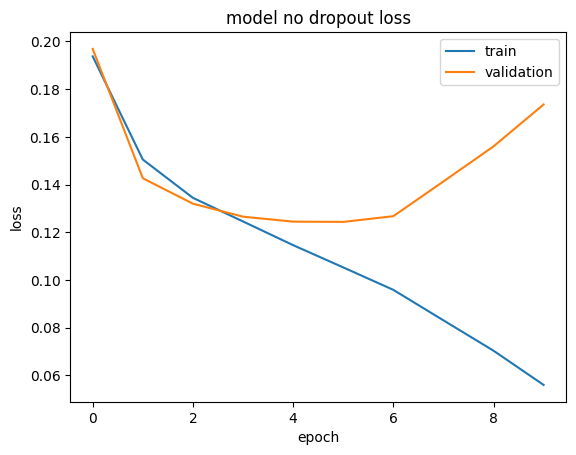

In [ ]:
# Plotting the training and validation loss
plt.plot(history_no_dropout.history['loss'])
plt.plot(history_no_dropout.history['val_loss'])

# Adding title, y-label and x-label to the plot
plt.title('model no dropout loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# Adding legend to the plot
plt.legend(['train', 'validation'], loc='upper right')

# Showing the plot
plt.show()

In [ ]:
gc.collect()

3859

In [ ]:
# Evaluate the model on the validation set
model_no_dropout.evaluate(x_val, y_val,batch_size=128)

# Calculate the f-beta score for the training set
train_fscore = fbeta_score(y_train, np.round(model_no_dropout.predict(x_train)), beta=2,average = 'weighted')
print("train fscore: ", train_fscore)

# Calculate the f-beta score for the validation set
val_fscore = fbeta_score(y_val, np.round(model_no_dropout.predict(x_val)), beta=2, average = 'weighted')
print("val fscore: ", val_fscore)

1012/1012 [==============================] - 4s 4ms/step
train fscore:  0.9525402043066244
253/253 [==============================] - 1s 3ms/step
val fscore:  0.8338373380955113


# **Confusion Matrix:**

253/253 [==============================] - 1s 4ms/step


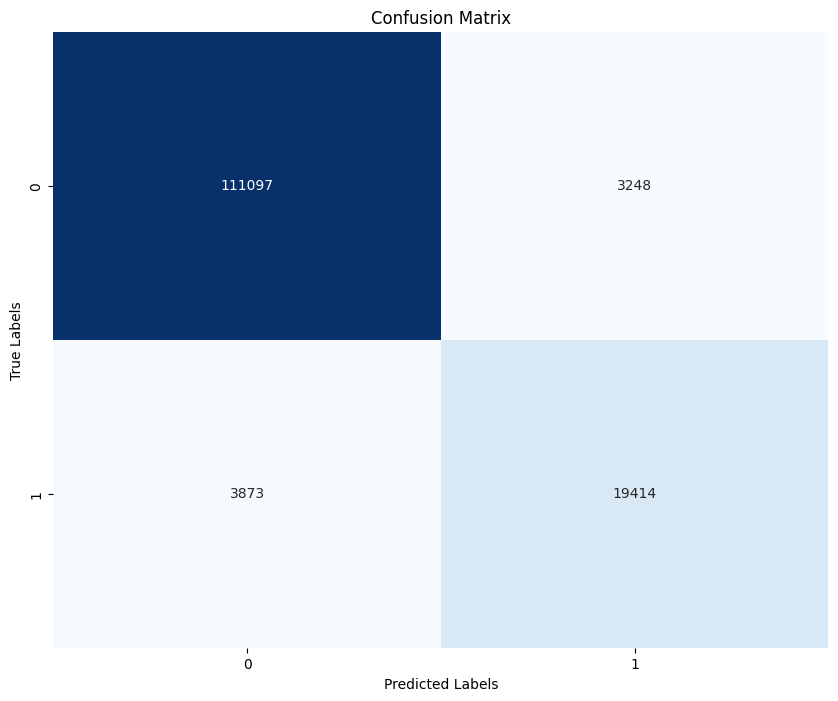

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions on the validation set
y_val_pred = model_no_dropout.predict(x_val)

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
y_val_pred_binary = np.round(y_val_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val.flatten(), y_val_pred_binary.flatten())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# **Model with Dropout:**

In [ ]:
# Instantiate the optimizer objects
optimizer_Adam = Adam()

In [ ]:
# Define The Model
model_with_dropout = keras.Sequential()

# Adding The Layers
# Batch Normalization layer is added as the first layer of the model_with_dropout, which normalize the input data.
model_with_dropout.add(BatchNormalization(input_shape=(64, 64, 3)))

# Convolutional layers and MaxPooling layers are added to extract features from the input images and reduce the spatial dimensions of the feature maps respectively.
model_with_dropout.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model_with_dropout.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_with_dropout.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layers are added to prevent overfitting.
model_with_dropout.add(Dropout(0.2))

# Same set of layers are added for the next set of features
model_with_dropout.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model_with_dropout.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_with_dropout.add(MaxPooling2D(pool_size=(2, 2)))

model_with_dropout.add(Dropout(0.2))

# Flatten layer is added to convert the 2D feature maps into a 1D feature vector
model_with_dropout.add(Flatten())

# Fully connected layers (dense layers) and dropout layers are added
model_with_dropout.add(Dense(512, activation='relu'))
model_with_dropout.add(Dropout(0.5))
model_with_dropout.add(Dense(17, activation='sigmoid'))

# Compiling the model_with_dropout by specifying the loss function, optimizer, and evaluation metrics
model_with_dropout.compile(optimizer=optimizer_Adam,
              loss='binary_crossentropy',
              metrics=[fbeta, accuracy_score])

# Training the model_with_dropout on the training data for 10 epoch with a batch size of 128, and validating the model_with_dropout on the validation data
history = model_with_dropout.fit(x_train, y_train,
                      batch_size=128,
                      epochs=10,
                      verbose=1,
                      validation_data=(x_val, y_val))

Epoch 1/10
253/253 [==============================] - 17s 54ms/step - loss: 0.2006 - fbeta: 0.7003 - accuracy_score: 0.9215 - val_loss: 0.1890 - val_fbeta: 0.6896 - val_accuracy_score: 0.9257
Epoch 2/10
253/253 [==============================] - 12s 48ms/step - loss: 0.1553 - fbeta: 0.7693 - accuracy_score: 0.9389 - val_loss: 0.1416 - val_fbeta: 0.7772 - val_accuracy_score: 0.9441
Epoch 3/10
253/253 [==============================] - 12s 48ms/step - loss: 0.1400 - fbeta: 0.7942 - accuracy_score: 0.9448 - val_loss: 0.1328 - val_fbeta: 0.7949 - val_accuracy_score: 0.9467
Epoch 4/10
253/253 [==============================] - 12s 49ms/step - loss: 0.1330 - fbeta: 0.8060 - accuracy_score: 0.9478 - val_loss: 0.1268 - val_fbeta: 0.8191 - val_accuracy_score: 0.9496
Epoch 5/10
253/253 [==============================] - 12s 48ms/step - loss: 0.1255 - fbeta: 0.8181 - accuracy_score: 0.9505 - val_loss: 0.1247 - val_fbeta: 0.8155 - val_accuracy_score: 0.9500
Epoch 6/10
253/253 [====================

In [ ]:
gc.collect()

0

In [ ]:
# Display the summary of the fine-tuned model
model_with_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 64, 64, 3)         12        
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 31, 31, 64)       

In [ ]:
# Free up some memory that is not being used by the program
gc.collect()

20

# **Training & Validation Loss :**

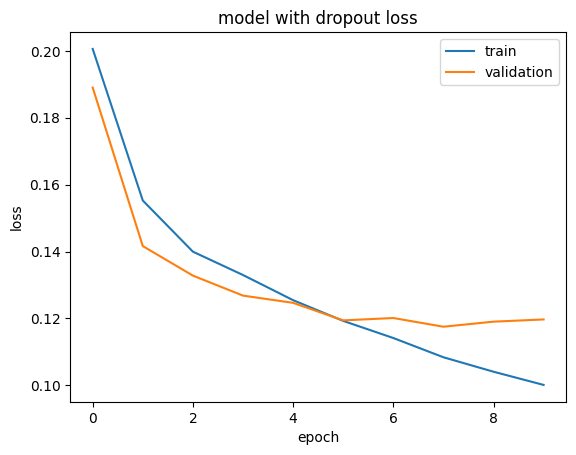

In [ ]:
# Plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Adding title, y-label and x-label to the plot
plt.title('model with dropout loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# Adding legend to the plot
plt.legend(['train', 'validation'], loc='upper right')

# Showing the plot
plt.show()

In [ ]:
# Free up some memory that is not being used by the program
gc.collect()

3673

In [ ]:
# Evaluate the model on the validation set
model_with_dropout.evaluate(x_val, y_val,batch_size=128)

# Calculate the f-beta score for the training set
train_fscore = fbeta_score(y_train, np.round(model_with_dropout.predict(x_train)), beta=2,average = 'weighted')
print("train fscore: ", train_fscore)

# Calculate the f-beta score for the validation set
val_fscore = fbeta_score(y_val, np.round(model_with_dropout.predict(x_val)), beta=2, average = 'weighted')
print("val fscore: ", val_fscore)

1012/1012 [==============================] - 3s 3ms/step
train fscore:  0.8768519540878217
253/253 [==============================] - 1s 3ms/step
val fscore:  0.8336683154160064


In [ ]:
# Free up some memory that is not being used by the program
gc.collect()

1253

# **Confusion Matrix:**

253/253 [==============================] - 1s 3ms/step


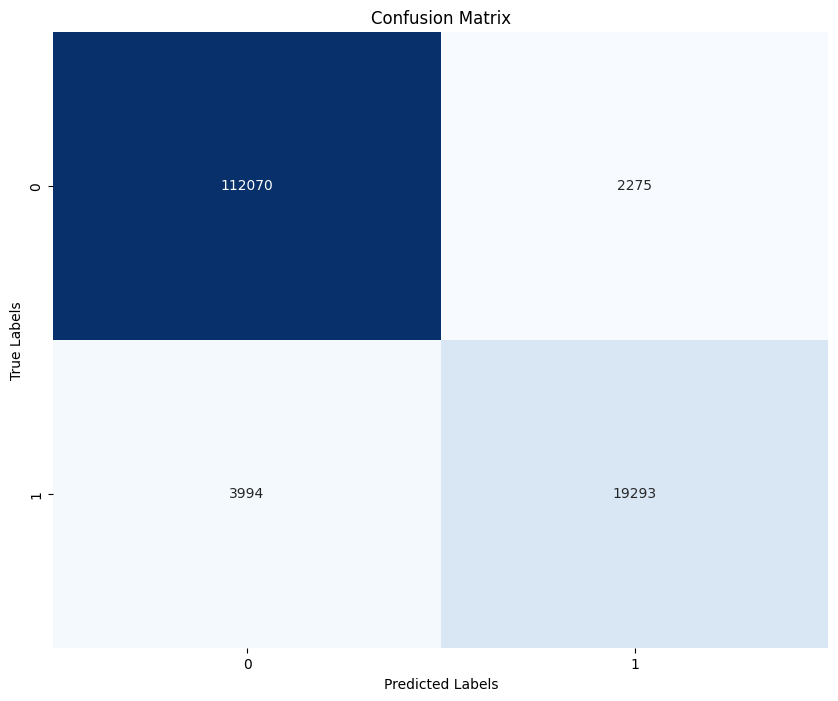

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions on the validation set
y_val_pred = model_with_dropout.predict(x_val)

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
y_val_pred_binary = np.round(y_val_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val.flatten(), y_val_pred_binary.flatten())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# **Dealing With The Overfitting:**

In [ ]:
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the model with regularization and dropout
model_with_improvements = Sequential()

# Input and Batch Normalization layer
model_with_improvements.add(BatchNormalization(input_shape=(64, 64, 3)))

# Convolutional and MaxPooling layers with L2 regularization
model_with_improvements.add(Conv2D(32, kernel_size=(3, 3), padding='same',
                                   activation='relu', kernel_regularizer=l2(0.001)))
model_with_improvements.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                                   kernel_regularizer=l2(0.001)))
model_with_improvements.add(MaxPooling2D(pool_size=(2, 2)))
model_with_improvements.add(Dropout(0.4))  # Increased dropout rate

# Additional Convolutional and MaxPooling layers with L2 regularization
model_with_improvements.add(Conv2D(64, kernel_size=(3, 3), padding='same',
                                   activation='relu', kernel_regularizer=l2(0.001)))
model_with_improvements.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                                   kernel_regularizer=l2(0.001)))
model_with_improvements.add(MaxPooling2D(pool_size=(2, 2)))
model_with_improvements.add(Dropout(0.4))  # Increased dropout rate

# Flatten layer to convert the 2D feature maps into a 1D feature vector
model_with_improvements.add(Flatten())

# Fully connected (Dense) layers with L2 regularization and Dropout
model_with_improvements.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model_with_improvements.add(Dropout(0.5))  # Increased dropout rate
model_with_improvements.add(Dense(17, activation='sigmoid'))  # Output layer

# Compile the model specifying the optimizer, loss function, and metrics
model_with_improvements.compile(optimizer='adam',
                                loss='binary_crossentropy',
                                metrics=[fbeta, accuracy_score])

# Set up early stopping callback to prevent overfitting
# if the validation loss does not decrease for five consecutive epochs, the training will be stopped early.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Set up data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.1)

# Fit the model using the augmented data generator
history = model_with_improvements.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    steps_per_epoch=len(x_train) / 128,
    epochs=10,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping])


Epoch 1/10
252/252 [==============================] - 54s 198ms/step - loss: 0.3680 - fbeta: 0.6643 - accuracy_score: 0.9156 - val_loss: 0.2537 - val_fbeta: 0.6747 - val_accuracy_score: 0.9208
Epoch 2/10
252/252 [==============================] - 50s 199ms/step - loss: 0.2301 - fbeta: 0.7106 - accuracy_score: 0.9266 - val_loss: 0.2112 - val_fbeta: 0.7471 - val_accuracy_score: 0.9317
Epoch 3/10
252/252 [==============================] - 47s 187ms/step - loss: 0.2152 - fbeta: 0.7238 - accuracy_score: 0.9295 - val_loss: 0.2004 - val_fbeta: 0.7434 - val_accuracy_score: 0.9336
Epoch 4/10
252/252 [==============================] - 49s 193ms/step - loss: 0.2077 - fbeta: 0.7320 - accuracy_score: 0.9316 - val_loss: 0.1949 - val_fbeta: 0.7538 - val_accuracy_score: 0.9353
Epoch 5/10
252/252 [==============================] - 47s 186ms/step - loss: 0.2029 - fbeta: 0.7364 - accuracy_score: 0.9322 - val_loss: 0.1904 - val_fbeta: 0.7419 - val_accuracy_score: 0.9351
Epoch 6/10
252/252 [===============

In [ ]:
gc.collect()

657

In [ ]:
# Display the summary of the fine-tuned model
model_with_improvements.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 64, 64, 3)         12        
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)       

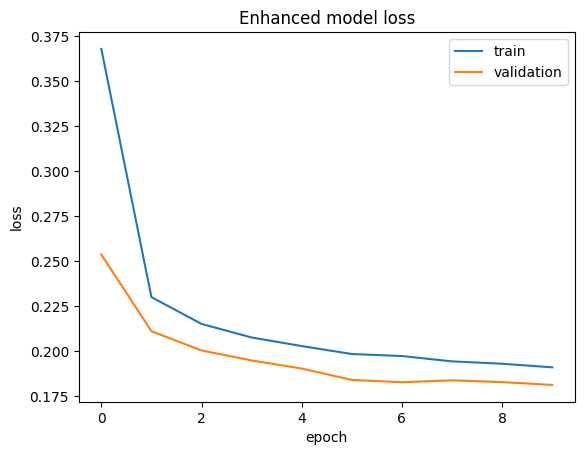

In [ ]:
# Plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Adding title, y-label and x-label to the plot
plt.title('Enhanced model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# Adding legend to the plot
plt.legend(['train', 'validation'], loc='upper right')

# Showing the plot
plt.show()

In [ ]:
gc.collect()

3960

In [ ]:
# Evaluate the model on the validation set
model_with_improvements.evaluate(x_val, y_val,batch_size=128)

# Calculate the f-beta score for the training set
train_fscore = fbeta_score(y_train, np.round(model_with_improvements.predict(x_train)), beta=2,average = 'weighted')
print("train fscore: ", train_fscore)

# Calculate the f-beta score for the validation set
val_fscore = fbeta_score(y_val, np.round(model_with_improvements.predict(x_val)), beta=2, average = 'weighted')
print("val fscore: ", val_fscore)

1012/1012 [==============================] - 4s 3ms/step
train fscore:  0.7358348197008131
253/253 [==============================] - 1s 4ms/step
val fscore:  0.7385010774995224


In [ ]:
gc.collect()

1257

253/253 [==============================] - 1s 3ms/step


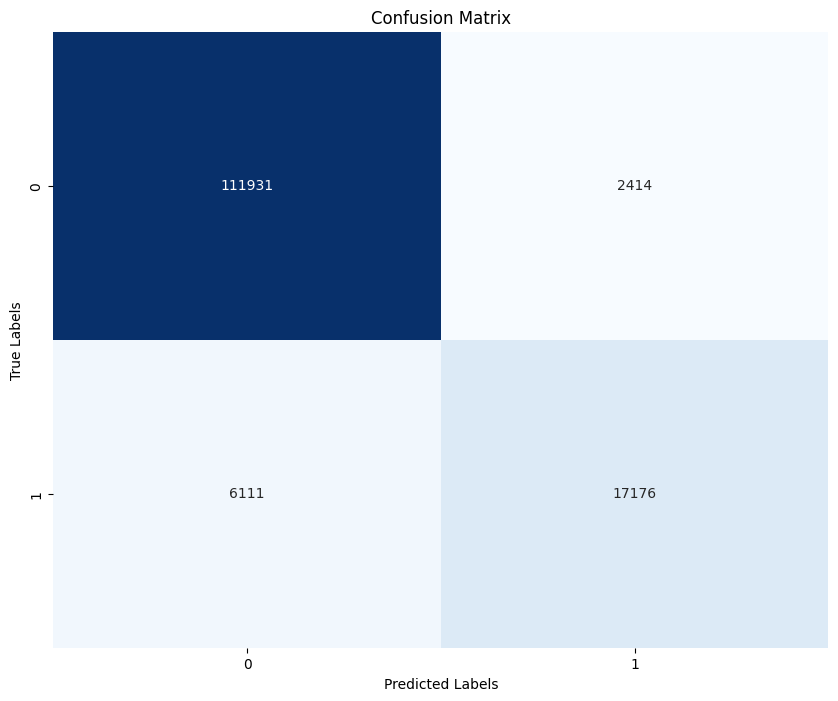

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions on the validation set
y_val_pred = model_with_improvements.predict(x_val)

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
y_val_pred_binary = np.round(y_val_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val.flatten(), y_val_pred_binary.flatten())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
gc.collect()

3046

# **Save The Model**

In [ ]:
model_with_improvements.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
model_with_improvements.save("model_keras.keras")

# **Test app**

In [ ]:
import pickle
import numpy as np
from PIL import Image

# Define the custom fbeta function
def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 2

    # Clipping y_pred between 0 and 1
    y_pred = K.clip(y_pred, 0, 1)

    # Rounding y_pred to binary values
    y_pred_bin = K.round(y_pred + threshold_shift)

    # Counting true positives, false positives, and false negatives
    tp = K.sum(K.round(y_true * y_pred_bin)) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

    # Calculating precision and recall
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    # Calculating the F-beta score
    return (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon())

# Define the custom accuracy_score function
def accuracy_score(y_true, y_pred, epsilon=1e-4):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(tf.cast(y_pred, tf.float32), tf.constant(0.5)), tf.float32)

    tp = tf.reduce_sum(y_true * y_pred, axis=1)
    fp = tf.reduce_sum(y_pred, axis=1) - tp
    fn = tf.reduce_sum(y_true, axis=1) - tp

    y_true = tf.cast(y_true, tf.bool)
    y_pred = tf.cast(y_pred, tf.bool)

    tn = tf.reduce_sum(tf.cast(tf.logical_not(y_true), tf.float32) * tf.cast(tf.logical_not(y_pred), tf.float32), axis=1)

    return (tp + tn) / (tp + tn + fp + fn + epsilon)

# Register the custom fbeta function
tf.keras.utils.get_custom_objects().update({'fbeta': fbeta,'accuracy_score': accuracy_score})

# Load the saved model
model_filename = 'trained_model_satellite_images.pkl'
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

def preprocess_image(image_path):
    img = Image.open(image_path)

    # Ensure the image has 3 channels (remove alpha channel, if present)
    img = img.convert('RGB')

    img = img.resize((64, 64))  # Adjust the size based on your model input shape
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load an example image for testing
example_image_path = '/kaggle/input/planets-dataset/planet/planet/train-jpg/train_10022.jpg'  # Replace with the actual path
processed_image = preprocess_image(example_image_path)

# Make a prediction using the loaded model
prediction = loaded_model.predict(processed_image)

classes = ['haze' 'primary' 'agriculture' 'clear' 'water' 'habitation' 'road'
 'cultivation' 'slash_burn' 'cloudy' 'partly_cloudy' 'conventional_mine'
 'bare_ground' 'artisinal_mine' 'blooming' 'selective_logging' 'blow_down']
# Convert model output to class labels based on the highest probability
# Assuming your_class_names is a DataFrame column
class_names = df_train['tags'].str.split()

# Now you can use predicted_class_indices to index your_class_names
predicted_classes = [class_names[i] for i in predicted_class_indices]

# Display the predicted class
print("Predicted Class:", predicted_classes)

In [ ]:
# Load the saved model
model_filename = 'trained_model_satellite_images.pkl'
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

def preprocess_image(image_path):
    img = Image.open(image_path)

    # Ensure the image has 3 channels (remove alpha channel, if present)
    img = img.convert('RGB')

    img = img.resize((64, 64))  # Adjust the size based on your model input shape
    img_array = np.array(img)
    img_array = img_array / 255.  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load an example image for testing
example_image_path = '/kaggle/input/planets-dataset/planet/planet/test-jpg/test_10004.jpg'  # Replace with the actual path
processed_image = preprocess_image(example_image_path)

# Make a prediction using the loaded model
prediction = loaded_model.predict(processed_image)

# Print predicted probabilities for each class
for class_name, probability in zip(class_names, prediction[0]):
    print(f"{class_name}: {probability}")

# Convert model output to class labels based on the highest probability
threshold = 0.5  # Adjust this threshold based on your analysis
predicted_classes = [classes[i] for i in range(len(classes)) if prediction[0][i] < threshold]

# Display the predicted classes
print("Predicted Classes:", predicted_classes)

In [ ]:
# Print the processed image
plt.imshow(processed_image[0])
plt.show()